-------------------------------------------------------------------------------------------------------------------------------

# Sentiment Analysis Opini Public Terhadap Kendaraan Listrik Menggunakan Algoritma Naive Bayes Classifier (NBC) Dengan Ekstraksi Fitur TF-IDF

-------------------------------------------------------------------------------------------------------------------------------

# Import Library

In [1]:
import re
import pandas as pd
import numpy as np
import string
import emoji
import swifter
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
dfclean = pd.read_excel("Preprocessing-Dataset.xlsx")
dfclean.head()

,Unnamed: 0,Created-At,From-User,Text,Label,Cleansing,Normalisasi,Tokenize,StopWord,Stemming,Comment
0,0,2023-05-16 11:05:50,The blues,Yaa semua produsen mobil listrik akan masuk la...,Positif,yaa semua produsen mobil listrik akan masuk la...,iya semua produsen mobil listrik akan masuk la...,"['iya', 'semua', 'produsen', 'mobil', 'listrik...","['produsen', 'mobil', 'listrik', 'produsennya'...","['produsen', 'mobil', 'listrik', 'produsen', '...",produsen mobil listrik produsen subsidi
1,1,2023-05-14 15:59:43,Da Yatv,presiden pak jokowi luar biasa kecerdasan dn p...,Positif,presiden pak jokowi luar biasa kecerdasan dn p...,presiden pak jokowi luar biasa kecerdasan dan ...,"['presiden', 'pak', 'jokowi', 'luar', 'biasa',...","['presiden', 'jokowi', 'kecerdasan', 'prestasi...","['presiden', 'jokowi', 'cerdas', 'prestasi', '...",presiden jokowi cerdas prestasi tarik usaha ge...
2,2,2023-03-02 05:29:04,Bobi Mputra,Mantap pak jokowi...saat nya indonesia penguas...,Positif,mantap pak jokowi saat nya indonesia penguas...,mantap pak jokowi saat nya indonesia penguasa ...,"['mantap', 'pak', 'jokowi', 'saat', 'nya', 'in...","['mantap', 'jokowi', 'indonesia', 'penguasa', ...","['mantap', 'jokowi', 'indonesia', 'kuasa', 'in...",mantap jokowi indonesia kuasa industri modern
3,3,2023-02-27 22:39:54,haflahdalwa,"Rakyat harus bersatu , kita sudah lama dijajah...",Positif,rakyat harus bersatu kita sudah lama dijajah...,rakyat harus bersatu kita sudah lama dijajah s...,"['rakyat', 'harus', 'bersatu', 'kita', 'sudah'...","['rakyat', 'bersatu', 'dijajah', 'maju', 'meng...","['rakyat', 'satu', 'jajah', 'maju', 'halang', ...",rakyat satu jajah maju halang maju negara dara...
4,4,2023-02-13 14:14:30,danimohamad,"Maju terus, jangan mundur, kita akan maju , in...",Positif,maju terus jangan mundur kita akan maju in...,maju terus jangan mundur kita akan maju inshaa...,"['maju', 'terus', 'jangan', 'mundur', 'kita', ...","['maju', 'mundur', 'maju']","['maju', 'mundur', 'maju']",maju mundur maju


In [3]:
# Remove Netral Label
dfclean = dfclean[dfclean['Label'] != 'Netral']
print(dfclean['Label'].value_counts())

dfclean = dfclean[dfclean['Label'] != 'Netral'].copy()

Positif    1906
Negatif    1605
Name: Label, dtype: int64


In [4]:
# cek nilai NaN pada setiap kolom
print(dfclean.isna().any())

# tampilkan baris yang mengandung nilai NaN
print(dfclean.loc[dfclean.isna().any(axis=1)])

# Menghapus baris yang mengandung nilai NaN dari DataFrame dfclean
dfclean = dfclean.dropna()

# Cek kembali nilai NaN pada setiap kolom setelah menghapus data NaN
print(dfclean.isna().any())

Unnamed: 0     False
Created-At     False
From-User      False
Text           False
Label          False
Cleansing      False
Normalisasi    False
Tokenize       False
StopWord       False
Stemming       False
Comment        False
dtype: bool
Empty DataFrame
Columns: [Unnamed: 0, Created-At, From-User, Text, Label, Cleansing, Normalisasi, Tokenize, StopWord, Stemming, Comment]
Index: []
Unnamed: 0     False
Created-At     False
From-User      False
Text           False
Label          False
Cleansing      False
Normalisasi    False
Tokenize       False
StopWord       False
Stemming       False
Comment        False
dtype: bool


In [5]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3511 entries, 0 to 3510
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   3511 non-null   int64         
 1   Created-At   3511 non-null   datetime64[ns]
 2   From-User    3511 non-null   object        
 3   Text         3511 non-null   object        
 4   Label        3511 non-null   object        
 5   Cleansing    3511 non-null   object        
 6   Normalisasi  3511 non-null   object        
 7   Tokenize     3511 non-null   object        
 8   StopWord     3511 non-null   object        
 9   Stemming     3511 non-null   object        
 10  Comment      3511 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 329.2+ KB


- Selection Column

In [6]:
# Selection Column
dfclean = dfclean[['Comment','Label']]
dfclean.head()

,Comment,Label
0,produsen mobil listrik produsen subsidi,Positif
1,presiden jokowi cerdas prestasi tarik usaha ge...,Positif
2,mantap jokowi indonesia kuasa industri modern,Positif
3,rakyat satu jajah maju halang maju negara dara...,Positif
4,maju mundur maju,Positif


In [7]:
dfclean['Label'].value_counts()

Positif    1906
Negatif    1605
Name: Label, dtype: int64

3511


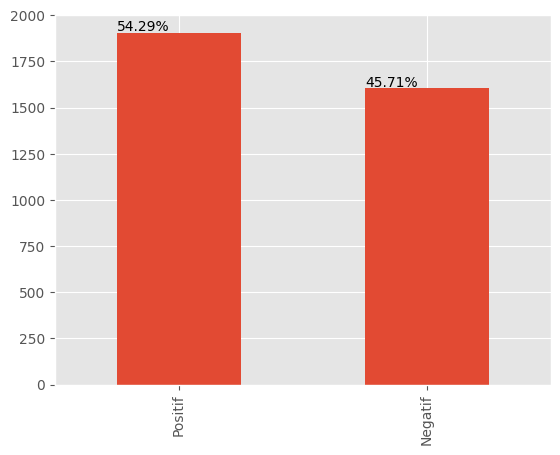

In [8]:
s = pd.value_counts(dfclean['Label'])
ax = s.plot.bar()
n = len(dfclean.index)
print(n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Spliting Data Train dan Test

In [9]:
train_df, test_df = train_test_split(dfclean, test_size=0.3, random_state=42)

In [10]:
train_df.to_excel('train-7030.xlsx', index=False)
test_df.to_excel('test-7030.xlsx', index=False)

In [11]:
train = pd.read_excel('train-7030.xlsx')
test = pd.read_excel('test-7030.xlsx')

In [12]:
train['Label'].value_counts()

Positif    1357
Negatif    1100
Name: Label, dtype: int64

In [13]:
test['Label'].value_counts()

Positif    549
Negatif    505
Name: Label, dtype: int64

# Ekstraksi Fitur With TF-IDF

- Ekstraksi Data Train

In [14]:
# count vectorizer & tf-idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Membaca data latih dan data test
train_df = pd.read_excel('train-7030.xlsx')
test_df = pd.read_excel('test-7030.xlsx')

# Menginisialisasi objek CountVectorizer
count_vec = CountVectorizer()

# Menggunakan fit_transform pada data latih untuk mendapatkan vektor count
train_count = count_vec.fit_transform(train_df['Comment']).toarray()

# Menginisialisasi objek TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=1500)

# Menggunakan fit_transform pada data latih untuk mendapatkan vektor TF-IDF
train_tfidf = tfidf_vec.fit_transform(train_df['Comment']).toarray()

# Mengonversi hasil ke dalam format DataFrame
df_train_tfidf = pd.DataFrame(train_tfidf, columns=tfidf_vec.get_feature_names_out())
df_train_tfidf.head()

,abad,ada,adaptasi,adas,adopsi,advance,afrika,agam,ahli,air,...,wisata,wktu,worth,wujud,wuling,yaaaa,yakin,zaman,zero,zona
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.942608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.171986,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Ekstraksi Data Test

In [15]:
# Membaca teks pada data test
comment_text = test_df['Comment']

# Menggunakan transform pada data test dengan CountVectorizer
test_count = count_vec.transform(comment_text).toarray()

# Menggunakan transform pada data test yang sudah dalam bentuk vektor count untuk mendapatkan vektor TF-IDF
test_tfidf = tfidf_vec.transform(comment_text).toarray()

# Mengonversi hasil ke dalam format DataFrame
df_test_tfidf = pd.DataFrame(test_tfidf, columns=tfidf_vec.get_feature_names_out())
df_test_tfidf.head()

,abad,ada,adaptasi,adas,adopsi,advance,afrika,agam,ahli,air,...,wisata,wktu,worth,wujud,wuling,yaaaa,yakin,zaman,zero,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Mengubah Label menjadi representasi angka

In [16]:
label_mapping = {'Negatif': 0, 'Positif': 1}
train_labels = train_df['Label'].map(label_mapping)
test_labels = test_df['Label'].map(label_mapping)

# Pemodelan Klasifikasi

- Manual Naive Bayes

In [17]:
from Nbc import MultinomialNBC

In [18]:
x_train = train_tfidf
y_train = train_labels

modelNBC = MultinomialNBC()
modelNBC.fit(x_train, y_train)

In [19]:
x_test = test_tfidf
y_test = test_labels

# Memprediksi label data test menggunakan model yang telah dilatih
predictNBC = modelNBC.predict(x_test)
predictNBC

array([0., 1., 0., ..., 0., 0., 1.])

In [20]:
# Mengubah representasi angka kembali ke label asli
predicted_labels_NBC = pd.Series(predictNBC).map({0: 'Negatif', 1: 'Positif'})
predicted_labels_NBC

0       Negatif
1       Positif
2       Negatif
3       Positif
4       Positif
         ...   
1049    Positif
1050    Positif
1051    Negatif
1052    Negatif
1053    Positif
Length: 1054, dtype: object

In [21]:
# Membuat DataFrame hasil prediksi
result_df_NBC = pd.DataFrame({
    'Comment': comment_text,
    'Label': test_df['Label'],
    'Classification': predicted_labels_NBC
})

result_df_NBC.head(20)

,Comment,Label,Classification
0,subsidi kaya subsidi mobil listrik bodoh,Negatif,Negatif
1,menperin bantu subsidi kendara listrik tarik m...,Positif,Positif
2,amat industri kendara listrik,Negatif,Negatif
3,ngerasa kembang teknologi kembang robotik scie...,Positif,Positif
4,kendara listrik pln diskon daya listrik rumah,Positif,Positif
5,mantap moga sukses kurang polusi udara,Positif,Positif
6,pabrikasi tambah stiker buat indonesia,Negatif,Positif
7,mesti indonesia ajar china hutang china,Negatif,Negatif
8,karna subsidi suruh beli kendara listrik priba...,Negatif,Negatif
9,alas perintah putus bantu kendara listrik ling...,Positif,Positif


1054


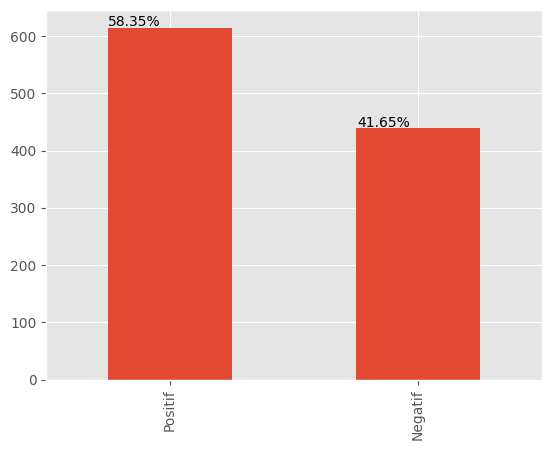

In [22]:
# Plot Grafik Hasil Analisis Naive Bayes
s = pd.value_counts(result_df_NBC['Classification'])
ax = s.plot.bar()
n = len(result_df_NBC.index)
print(n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

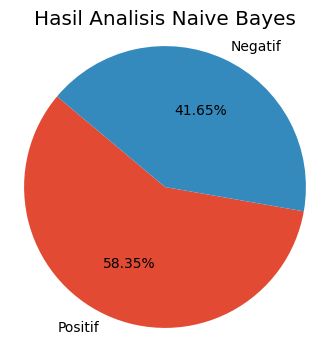

In [23]:
# Data
s = pd.value_counts(result_df_NBC['Classification'])
n = len(result_df_NBC.index)
percentages = [round(count / n * 100, 2) for count in s]

# Plot
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=s.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Hasil Analisis Naive Bayes')
plt.show()

In [24]:
result_df_NBC['Classification'].value_counts()

Positif    615
Negatif    439
Name: Classification, dtype: int64

- Evaluasi Model Naive Bayes

Akurasi: 0.7609108159392789
Presisi: 0.7414634146341463
Recall: 0.8306010928961749
F1-Score: 0.7835051546391754
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       505
           1       0.74      0.83      0.78       549

    accuracy                           0.76      1054
   macro avg       0.76      0.76      0.76      1054
weighted avg       0.76      0.76      0.76      1054

Confusion Matrix:
[[346 159]
 [ 93 456]]


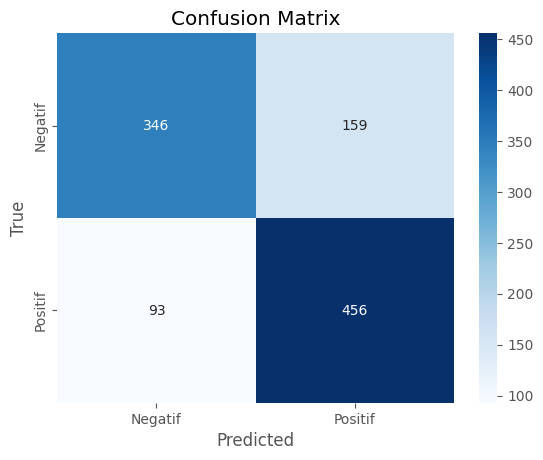

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, predictNBC)
print("Akurasi:", accuracy)

# Menghitung akurasi
precision = precision_score(y_test, predictNBC)
print("Presisi:", precision)

# Menghitung akurasi
recall = recall_score(y_test, predictNBC)
print("Recall:", recall)

# Menghitung akurasi
f1 = f1_score(y_test, predictNBC)
print("F1-Score:", f1)

# Menampilkan classification report
report = classification_report(y_test, predictNBC)
print("Classification Report:")
print(report)

# Menampilkan confusion matrix
matrix = confusion_matrix(y_test, predictNBC)
print("Confusion Matrix:")
print(matrix)

# Visualisasi confusion matrix
labels = np.unique(test_df['Label'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Ekstraksi Fitur Without TF-IDF

In [26]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Membaca data latih dan data test
train_df = pd.read_excel('train-7030.xlsx')
test_df = pd.read_excel('test-7030.xlsx')

# Menginisialisasi objek CountVectorizer
count_vec = CountVectorizer(max_features=1500)

# Menggunakan fit_transform pada data latih untuk mendapatkan vektor count
train_count = count_vec.fit_transform(train_df['Comment']).toarray()

# Mengonversi hasil ke dalam format DataFrame
df_train_count = pd.DataFrame(train_count, columns=count_vec.get_feature_names_out())
df_train_count.head()

,abad,ada,adaptasi,adas,adopsi,advance,afrika,agam,ahli,air,...,wisata,wktu,worth,wujud,wuling,yaaaa,yakin,zaman,zero,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# count vectorizer
# Membaca teks pada data test
comment_text = test_df['Comment']

# Menggunakan transform pada data test dengan CountVectorizer
test_count = count_vec.transform(comment_text).toarray()

# Mengonversi hasil ke dalam format DataFrame
df_test_count = pd.DataFrame(test_count, columns=count_vec.get_feature_names_out())
df_test_count.head()

,abad,ada,adaptasi,adas,adopsi,advance,afrika,agam,ahli,air,...,wisata,wktu,worth,wujud,wuling,yaaaa,yakin,zaman,zero,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
label_mapping = {'Negatif': 0, 'Positif': 1}
train_labels = train_df['Label'].map(label_mapping)
test_labels = test_df['Label'].map(label_mapping)

In [29]:
from Nbc import MultinomialNBC

In [30]:
x_train = train_count
y_train = train_labels

modelNBC_vec = MultinomialNBC()
modelNBC_vec.fit(x_train, y_train)

In [31]:
x_test = test_count
y_test = test_labels

# Memprediksi label data test menggunakan model yang telah dilatih
predictNBC_vec = modelNBC_vec.predict(x_test)
predictNBC_vec

array([0., 1., 1., ..., 0., 0., 1.])

In [32]:
# Mengubah representasi angka kembali ke label asli
predicted_labels_NBC_vec = pd.Series(predictNBC_vec).map({0: 'Negatif', 1: 'Positif'})
predicted_labels_NBC_vec

0       Negatif
1       Positif
2       Positif
3       Positif
4       Positif
         ...   
1049    Positif
1050    Positif
1051    Negatif
1052    Negatif
1053    Positif
Length: 1054, dtype: object

In [33]:
# Membuat DataFrame hasil prediksi
result_df_NBC_vec = pd.DataFrame({
    'Comment': comment_text,
    'Label': test_df['Label'],
    'Classification': predicted_labels_NBC_vec
})

result_df_NBC.head(20)

,Comment,Label,Classification
0,subsidi kaya subsidi mobil listrik bodoh,Negatif,Negatif
1,menperin bantu subsidi kendara listrik tarik m...,Positif,Positif
2,amat industri kendara listrik,Negatif,Negatif
3,ngerasa kembang teknologi kembang robotik scie...,Positif,Positif
4,kendara listrik pln diskon daya listrik rumah,Positif,Positif
5,mantap moga sukses kurang polusi udara,Positif,Positif
6,pabrikasi tambah stiker buat indonesia,Negatif,Positif
7,mesti indonesia ajar china hutang china,Negatif,Negatif
8,karna subsidi suruh beli kendara listrik priba...,Negatif,Negatif
9,alas perintah putus bantu kendara listrik ling...,Positif,Positif


1054


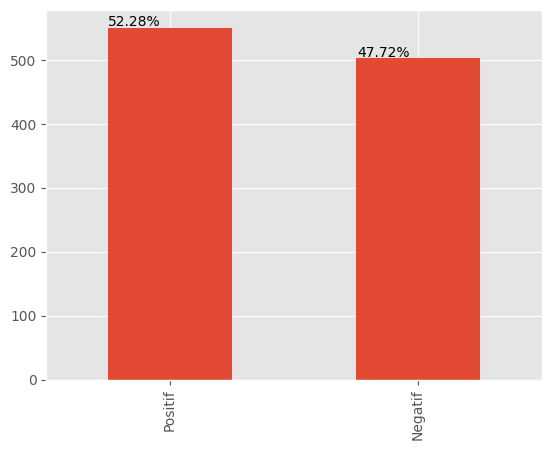

In [34]:
# Plot Grafik Hasil Analisis Naive Bayes
s = pd.value_counts(result_df_NBC_vec['Classification'])
ax = s.plot.bar()
n = len(result_df_NBC_vec.index)
print(n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

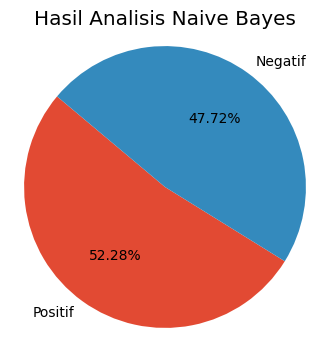

In [35]:
# Data
s = pd.value_counts(result_df_NBC_vec['Classification'])
n = len(result_df_NBC_vec.index)
percentages = [round(count / n * 100, 2) for count in s]

# Plot
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=s.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Hasil Analisis Naive Bayes')
plt.show()

In [36]:
result_df_NBC_vec['Classification'].value_counts()

Positif    551
Negatif    503
Name: Classification, dtype: int64

Akurasi: 0.7741935483870968
Presisi: 0.7822141560798548
Recall: 0.785063752276867
F1-Score: 0.7836363636363637
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       505
           1       0.78      0.79      0.78       549

    accuracy                           0.77      1054
   macro avg       0.77      0.77      0.77      1054
weighted avg       0.77      0.77      0.77      1054

Confusion Matrix:
[[385 120]
 [118 431]]


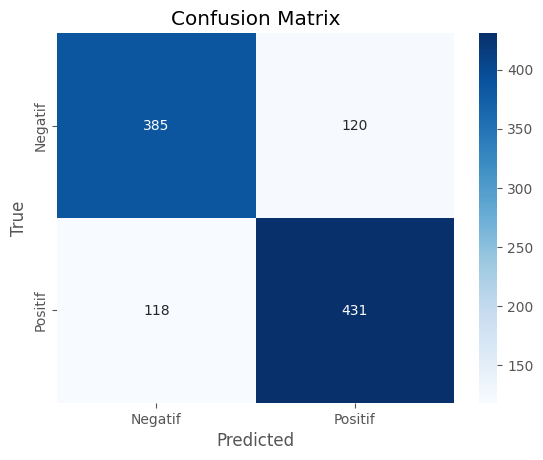

In [37]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, predictNBC_vec)
print("Akurasi:", accuracy)

# Menghitung akurasi
precision = precision_score(y_test, predictNBC_vec)
print("Presisi:", precision)

# Menghitung akurasi
recall = recall_score(y_test, predictNBC_vec)
print("Recall:", recall)

# Menghitung akurasi
f1 = f1_score(y_test, predictNBC_vec)
print("F1-Score:", f1)

# Menampilkan classification report
report = classification_report(y_test, predictNBC_vec)
print("Classification Report:")
print(report)

# Menampilkan confusion matrix
matrix = confusion_matrix(y_test, predictNBC_vec)
print("Confusion Matrix:")
print(matrix)

# Visualisasi confusion matrix
labels = np.unique(test_df['Label'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# import pickle

# tfidf_vectorizer = pickle.dump(tfidf_vec, open('tfidf_vectorizer.pkl', 'wb'))
# naive_bayes_tfidf = pickle.dump(modelNBC, open('naive_bayes_tfidf.pkl', 'wb'))
# count_vectorizer = pickle.dump(count_vec, open('count_vectorizer.pkl', 'wb'))
# naive_bayes_vec = pickle.dump(modelNBC_vec, open('naive_bayes_vec.pkl', 'wb'))